<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#importing-important-library" data-toc-modified-id="importing-important-library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>importing important library</a></span></li><li><span><a href="#Feature-Selection-By-Dropping-constant-features" data-toc-modified-id="Feature-Selection-By-Dropping-constant-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Selection By Dropping constant features</a></span><ul class="toc-item"><li><span><a href="#Variance-Threshold" data-toc-modified-id="Variance-Threshold-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Variance Threshold</a></span></li><li><span><a href="#practicing-on-bigger-dataset" data-toc-modified-id="practicing-on-bigger-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>practicing on bigger dataset</a></span></li></ul></li><li><span><a href="#Feature-Selection-With-Pearson-correlation-Correlation" data-toc-modified-id="Feature-Selection-With-Pearson-correlation-Correlation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Selection With Pearson correlation Correlation</a></span></li><li><span><a href="#Select-Features-Using-Information-Gain-For-Classification-In-ML" data-toc-modified-id="Select-Features-Using-Information-Gain-For-Classification-In-ML-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Select Features Using Information Gain For Classification In ML</a></span></li><li><span><a href="#Feature-Selection-Using-Information-Gain-For-Regression-In-ML" data-toc-modified-id="Feature-Selection-Using-Information-Gain-For-Regression-In-ML-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Selection Using Information Gain For Regression In ML</a></span></li><li><span><a href="#Perform-Feature-Selection-Using-Chi2-Statistical-Analysis" data-toc-modified-id="Perform-Feature-Selection-Using-Chi2-Statistical-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Perform Feature Selection Using Chi2 Statistical Analysis</a></span></li><li><span><a href="#Various-Feature-Selection-Technique" data-toc-modified-id="Various-Feature-Selection-Technique-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Various Feature Selection Technique</a></span><ul class="toc-item"><li><span><a href="#Univariate-Selection" data-toc-modified-id="Univariate-Selection-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Univariate Selection</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Correlation</a></span></li></ul></li></ul></li></ul></div>

## importing important library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split

## Feature Selection By Dropping constant features
will be removing features which have constant features which are actually not important for solving problem statement

In [2]:
data = pd.DataFrame({"A":[1,2,4,1,2,4], 
                    "B":[4,5,6,7,8,9], 
                    "C":[0,0,0,0,0,0],
                    "D":[1,1,1,1,1,1]}) 
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


### Variance Threshold
Feature selector that removes all low-variance features\
This feature selection algorithm looks only at features (X) not desired outputs (y) and can thus be used for unsupervised learning

In [3]:
# It will count all zero variance features or constant columns as constant columns has zero variance
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [4]:
# false means zero variance features
var_thres.get_support()

array([ True,  True, False, False])

In [5]:
# gets all non constant columns
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [8]:
constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
print(len(constant_columns))
for feature in constant_columns:
     print(feature)

2
C
D


In [12]:
# droping constant columns
data.drop(constant_columns,axis=1,inplace=True)
data.head()

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8


### practicing on bigger dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

Detailed work is done on below notebook, Variance Threshold only works on column with int or float not string

https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/1.%20Feature%20Selection-%20Dropping%20Constant%20Features.ipynb



In [28]:
df=pd.read_csv('Datafiles/santander.csv')
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [30]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [34]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['TARGET'], axis=1), df['TARGET'],test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((7000, 370), (3000, 370))

In [35]:
# applying variance threshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [41]:
# returns all constant and non constant columns
len(var_thres.get_support())

370

In [40]:
# sums all non constant columns
sum(var_thres.get_support())

284

In [42]:
# Find all non-constant features 
len(X_train.columns[var_thres.get_support()])

284

In [43]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

86


In [44]:
X_train.drop(constant_columns,axis=1,inplace=True)
X_train.shape

(7000, 284)

## Feature Selection With Pearson correlation Correlation
will be removing features which are highly correlated

In [45]:
df=pd.read_csv('Datafiles/santander.csv')
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['TARGET'], axis=1),df['TARGET'],test_size=0.3,random_state=0)

In [49]:
X_train.corr().T

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,0.003868,-0.007921,0.026313,0.010195,0.003226,-0.001037,-0.008416,0.009563,0.001776,...,-0.016729,-0.015758,-0.010380,-0.013348,-0.012468,-0.004889,0.008355,-0.010153,-0.007876,-0.003619
var3,0.003868,1.000000,-0.009840,0.000892,0.004527,0.004604,0.000984,0.001146,0.000417,0.000477,...,0.000247,0.000412,0.000428,0.000433,0.000452,0.000570,0.000337,0.000671,0.000669,-0.000065
var15,-0.007921,-0.009840,1.000000,0.033884,0.117646,0.124938,0.059411,0.074257,0.018217,0.019172,...,0.019788,0.026903,0.024832,0.027281,0.027676,0.022812,0.031673,0.024141,0.023195,-0.005522
imp_ent_var16_ult1,0.026313,0.000892,0.033884,1.000000,0.017469,0.015492,0.010331,0.007650,-0.000866,-0.000991,...,0.037854,-0.000822,-0.000812,-0.000867,-0.000899,-0.001184,-0.000700,-0.001394,-0.001391,0.001352
imp_op_var39_comer_ult1,0.010195,0.004527,0.117646,0.017469,1.000000,0.877170,0.506263,0.455786,0.052864,0.068169,...,0.016903,0.017639,0.044972,0.024841,0.032876,-0.001352,-0.003516,0.000278,0.000051,0.006273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.004889,0.000570,0.022812,-0.001184,-0.001352,0.001320,-0.001268,-0.001421,-0.000555,-0.000636,...,-0.000329,-0.000527,-0.000521,-0.000556,-0.000576,1.000000,0.617695,0.920544,0.933605,0.000002
saldo_medio_var44_hace3,0.008355,0.000337,0.031673,-0.000700,-0.003516,0.000460,-0.000750,-0.000840,-0.000328,-0.000376,...,-0.000195,-0.000312,-0.000308,-0.000329,-0.000341,0.617695,1.000000,0.521398,0.474861,-0.004989
saldo_medio_var44_ult1,-0.010153,0.000671,0.024141,-0.001394,0.000278,0.000916,-0.001492,-0.001672,-0.000654,-0.000748,...,-0.000388,-0.000621,-0.000613,-0.000655,-0.000679,0.920544,0.521398,1.000000,0.983012,-0.000798
saldo_medio_var44_ult3,-0.007876,0.000669,0.023195,-0.001391,0.000051,0.000364,-0.001489,-0.001669,-0.000652,-0.000747,...,-0.000387,-0.000620,-0.000612,-0.000653,-0.000677,0.933605,0.474861,0.983012,1.000000,0.000160


<AxesSubplot: >

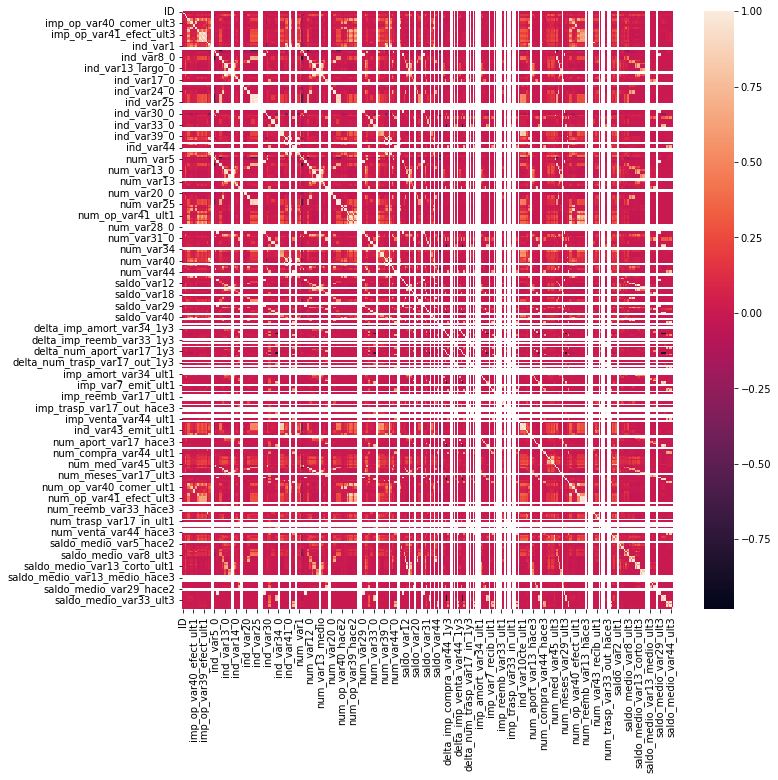

In [46]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [52]:
corr_matrix = X_train.corr()
len(corr_matrix.columns)

370

In [53]:
# with following function can select highly correlated features
# it will remove first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [56]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [58]:
# droping all highly correlated features
X_train.drop(corr_features,axis=1,inplace=True)
X_train.shape

(7000, 214)

## Select Features Using Information Gain For Classification In ML

```
Mutual Information - MI Estimate mutual information for a discrete target variable
Mutual information (MI) between two random variables is a non-negative value which measures dependency between variables
It is equal to zero if and only if two random variables are independent and higher values mean higher dependency
function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances
A quantity called mutual information measures amount of information one can obtain from one random variable given another
mutual information between two random variables X and Y can be stated formally as follows:
I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is mutual information for X and Y, H(X) is entropy for X and H(X | Y) is conditional entropy for X given Y 
result has units of bits

Youtube Videos for better understand
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw
Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA
https://www.youtube.com/watch?v=YrhlQB3mQFI
```

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [6]:
# Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),df['Wine'],test_size=0.3,random_state=0)

In [7]:
from sklearn.feature_selection import mutual_info_classif
# determine mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.40828362, 0.29095022, 0.18507578, 0.2361379 , 0.16193333,
       0.48995107, 0.70938144, 0.14950604, 0.25884183, 0.61655982,
       0.54164486, 0.5480814 , 0.54400682])

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.709381
Color.int               0.616560
OD                      0.548081
Proline                 0.544007
Hue                     0.541645
Phenols                 0.489951
Alcohol                 0.408284
Malic.acid              0.290950
Proanth                 0.258842
Acl                     0.236138
Ash                     0.185076
Mg                      0.161933
Nonflavanoid.phenols    0.149506
dtype: float64

<AxesSubplot: >

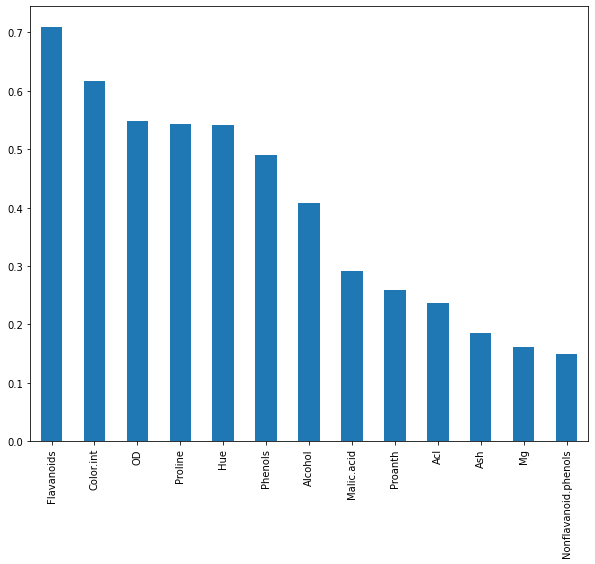

In [10]:
# plot ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 8))

In [11]:
from sklearn.feature_selection import SelectKBest
# select top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

```
Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)
mutual information is sometimes used as a synonym for information gain, Technically they calculate same quantity if applied to same data

Comparion of Univariate And Mutual Information
Comparison of F-test and mutual information 
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py
```

## Feature Selection Using Information Gain For Regression In ML

Mutual Information - MI Estimate mutual information for a continuous target variable

In [2]:
housing_df=pd.read_csv(r'C:/Users/SHEHA/Downloads/GitHubRepository/Python2022/TaskNotebooks/Datasets/trainHousePrices.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [8]:
len(numerical_cols)

38

In [9]:
housing_df=housing_df[numerical_cols]
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
housing_df=housing_df.drop("Id",axis=1)

In [13]:
# It is always a good practice to split train and test data to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(housing_df.drop(labels=['SalePrice'], axis=1), housing_df['SalePrice'],test_size=0.3,random_state=0)
X_train.shape

(1022, 36)

In [17]:
X_train.fillna(0, inplace=True)

In [18]:
X_train.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [19]:
from sklearn.feature_selection import mutual_info_regression
# determine mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.2475421 , 0.2080411 , 0.16716184, 0.52019405, 0.11430789,
       0.3537473 , 0.24567007, 0.09359071, 0.1600119 , 0.01608787,
       0.11018328, 0.38582764, 0.3137358 , 0.22946161, 0.0012303 ,
       0.48235779, 0.0225787 , 0.0080788 , 0.2721369 , 0.08056522,
       0.03728762, 0.01588537, 0.18715951, 0.17673147, 0.26864731,
       0.3738197 , 0.36657014, 0.0665911 , 0.17267274, 0.00923036,
       0.        , 0.03040928, 0.0045736 , 0.        , 0.        ,
       0.        ])

In [21]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.520194
GrLivArea        0.482358
TotalBsmtSF      0.385828
GarageCars       0.373820
GarageArea       0.366570
YearBuilt        0.353747
1stFlrSF         0.313736
FullBath         0.272137
GarageYrBlt      0.268647
MSSubClass       0.247542
YearRemodAdd     0.245670
2ndFlrSF         0.229462
LotFrontage      0.208041
TotRmsAbvGrd     0.187160
Fireplaces       0.176731
OpenPorchSF      0.172673
LotArea          0.167162
BsmtFinSF1       0.160012
OverallCond      0.114308
BsmtUnfSF        0.110183
MasVnrArea       0.093591
HalfBath         0.080565
WoodDeckSF       0.066591
BedroomAbvGr     0.037288
ScreenPorch      0.030409
BsmtFullBath     0.022579
BsmtFinSF2       0.016088
KitchenAbvGr     0.015885
EnclosedPorch    0.009230
BsmtHalfBath     0.008079
PoolArea         0.004574
LowQualFinSF     0.001230
3SsnPorch        0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

<AxesSubplot: >

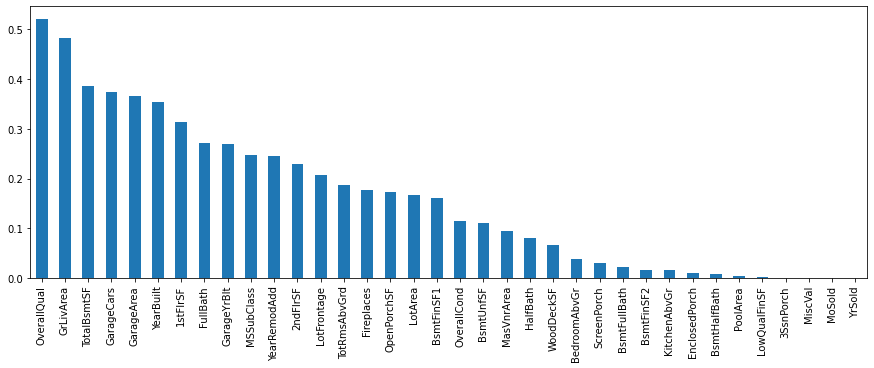

In [22]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [23]:
from sklearn.feature_selection import SelectPercentile
# Selecting top 20 percentile, top 20 percentile means 80% of data are dependent on features resulting from this function
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001F63AA67C70>)

In [24]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [25]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [28]:
from sklearn.feature_selection import SelectKBest
# select top 5 important features
sel_five_cols = SelectKBest(mutual_info_regression, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

## Perform Feature Selection Using Chi2 Statistical Analysis

```
Chisquare Test used For Feature Selection for categorical variables in a classification task, it's also called Fisher Score
Compute chi-squared stats between each non-negative feature and class, This score should be used to evaluate categorical variables 
This score can be used to select n_features features with highest values for test chi-squared statistic from X which must contain only non-negative features such as booleans or frequencies relative to classes
Recall that the chi-square test measures dependence between stochastic variables so using this function weeds out features that are most likely to be independent of class and therefore irrelevant for classification 
Chi Square statistic is commonly used for testing relationships between categorical variables
It compares observed distribution of different classes of target Y among different categories of feature against 
expected distribution of target classes regardless of feature categories
```

In [3]:
# loading titanic dataset
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# taking categorical like features
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [6]:
# finding all labels of feature columns
f = ['sex','embarked','alone','pclass']
for i in f:
    print(i," ",df[i].unique())

sex   ['male' 'female']
embarked   ['S' 'C' 'Q' nan]
alone   [False  True]
pclass   [3 1 2]


In [7]:
from collections import Counter
print(Counter(df['embarked']).keys()) # equals to list(set(words))
print(Counter(df['embarked']).values()) # counts elements' frequency

dict_keys(['S', 'C', 'Q', nan])
dict_values([644, 168, 77, 2])


In [8]:
# perform label encoding on all feature columns
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}  # labeling will start from 0
df['embarked'] = df['embarked'].map(ordinal_label)
df['embarked'].unique()

array([0, 1, 2, 3], dtype=int64)

In [9]:
ordinal_label = {k: i for i, k in enumerate(df['sex'].unique(), 0)}  # labeling will start from 0
df['sex'] = df['sex'].map(ordinal_label)
df['sex'].unique()

array([0, 1], dtype=int64)

In [10]:
ordinal_label = {k: i for i, k in enumerate(df['pclass'].unique(), 0)}  # labeling will start from 0
df['pclass'] = df['pclass'].map(ordinal_label)
df['pclass'].unique()

array([0, 1, 2], dtype=int64)

In [11]:
ordinal_label = {k: i for i, k in enumerate(df['alone'].unique(), 0)}  # labeling will start from 0
df['alone'] = df['alone'].map(ordinal_label)
df['alone'].unique()

array([0, 1], dtype=int64)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],df['survived'],test_size=0.3,random_state=0)
X_train.head()

,sex,embarked,alone,pclass
857,0,0,1,1
52,1,1,0,1
386,0,0,0,0
124,0,0,0,1
578,1,1,0,0


In [13]:
X_train.shape

(623, 4)

In [14]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [15]:
# Performing chi2 test, chi2 returns 2 values: Fscore and pvalue
# higher Fscore is better means important feature and lower pvalue is better means important feature
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([120.6057083 ,  11.83961845,   9.03328564,  38.34609065]),
 array([4.66154782e-28, 5.79837058e-04, 2.65107556e-03, 5.92466581e-10]))

In [19]:
p_values=pd.Series(f_p_values[1]) # taking p values
p_values.index=X_train.columns
p_values.sort_values() # lower feature will be at first

sex         4.661548e-28
pclass      5.924666e-10
embarked    5.798371e-04
alone       2.651076e-03
dtype: float64

In [20]:
4.661548e-28 < 5.924666e-10

True

In [21]:
f_values=pd.Series(f_p_values[0]) # taking Fscore values
f_values.index=X_train.columns
f_values.sort_values(ascending=False) # higher feature will be at first

sex         120.605708
pclass       38.346091
embarked     11.839618
alone         9.033286
dtype: float64

Observation: Sex Column is most important column when compared to output feature Survived as most female passengers survived in titanic disaster

## Various Feature Selection Technique

In [3]:
df=pd.read_csv('Datafiles/mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Univariate Selection

In [11]:
X=df.iloc[:,:-1]
y=df['price_range']

In [12]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [13]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Applying SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [8]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [15]:
# showing top 10 feature
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### Feature Importance
This technique gives a score for each feature of data, higher score means more relevant it is

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [17]:
print(model.feature_importances_)

[0.06112018 0.02001077 0.03303407 0.02057864 0.03253525 0.01629147
 0.03521221 0.03434643 0.03686602 0.03217656 0.03345623 0.04672686
 0.05035858 0.39066342 0.03485141 0.03357711 0.03510377 0.01437619
 0.01833988 0.02037496]


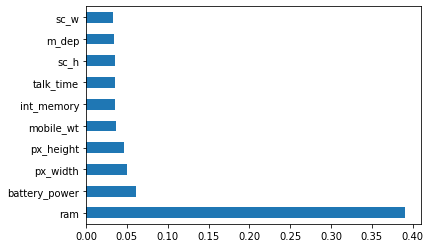

In [18]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation

<AxesSubplot: >

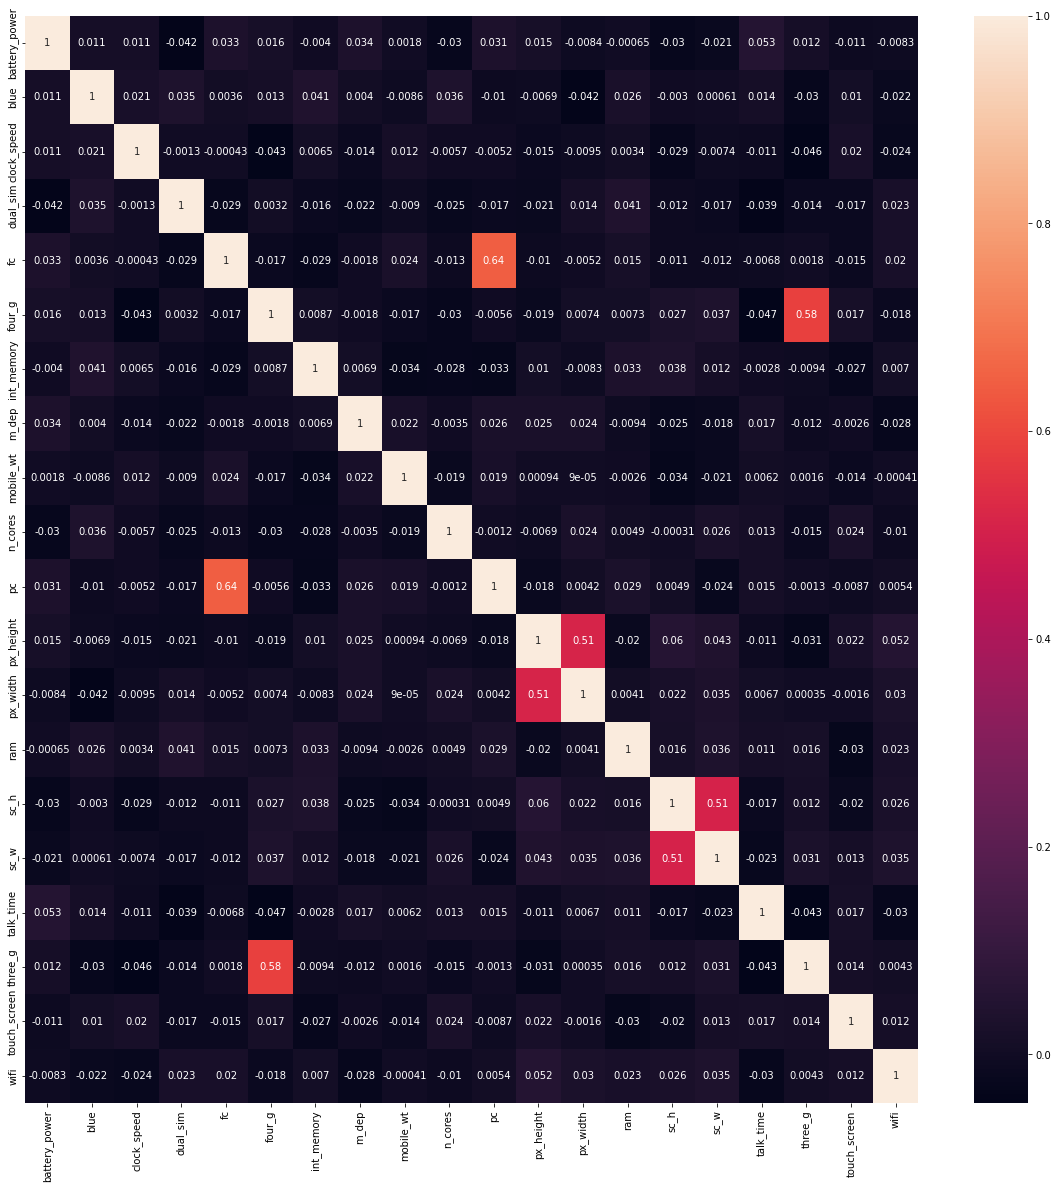

In [19]:
import seaborn as sns
corr=df.iloc[:,:-1].corr()   # -1 means removing target variable
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

In [22]:
# find and remove correlated features
threshold=0.5
def correlation(dataset, threshold):
    col_corr = set()  # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting name of column
                col_corr.add(colname)
    return col_corr

In [23]:
correlation(df.iloc[:,:-1],threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}